<a href="https://colab.research.google.com/github/KNmitra/Bhavcopy/blob/master/PortfolioAnalysisUsingPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Installing some usefull library and import tham
#Downloading historical data from Nsepy
import warnings
warnings.filterwarnings('ignore')
try:
    import nsepy
except:
    !pip install -q nsepy
    import nsepy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import date,timedelta
from nsepy import get_history as history_data
plt.style.use('fivethirtyeight')


  Preparing metadata (setup.py) ... done


In [4]:
stocksymbols = ['TATAMOTORS','DABUR', 'ICICIBANK','WIPRO','BPCL','IRCTC','INFY','RELIANCE']
#startdate = date(2019,10,14)
start_date= date.today()-timedelta(days=365*5)
end_date = date.today()
print(end_date)
print(f"You have {len(stocksymbols)} assets in your porfolio" )

2023-01-08
You have 8 assets in your porfolio


In [9]:
#fetching data
df = pd.DataFrame()
for i in range (len(stocksymbols)):
    data = history_data(symbol=stocksymbols[i],start =(start_date),end =(end_date))[['Symbol','Close']]
    data.rename(columns={'Close':data['Symbol'][0]},inplace = True)
    data.drop(['Symbol'],axis = 1 , inplace = True)
    if i == 0 :
        df = data
    if i != 0 :
        df = df.join(data)
    
print(df.tail(10))


            TATAMOTORS   DABUR  ICICIBANK   WIPRO    BPCL   IRCTC     INFY  \
Date                                                                         
2022-12-26      384.80  566.10     893.20  380.50  325.10  622.05  1502.40   
2022-12-27      394.15  573.50     900.65  386.60  326.00  633.10  1514.85   
2022-12-28      391.30  569.15     898.95  387.80  324.10  638.75  1510.15   
2022-12-29      385.90  560.95     908.05  390.75  327.20  633.05  1517.55   
2022-12-30      387.95  561.45     890.85  392.75  330.50  639.70  1508.20   
2023-01-02      394.80  561.55     902.45  393.05  333.85  642.35  1524.00   
2023-01-03      393.90  560.85     901.35  397.05  336.85  644.05  1522.55   
2023-01-04      385.60  559.85     899.10  389.70  336.30  635.20  1494.80   
2023-01-05      386.90  572.75     879.15  386.90  342.35  637.15  1475.20   
2023-01-06      382.00  552.85     870.10  382.00  344.70  636.25  1448.50   

            RELIANCE  
Date                  
2022-12-26   2524

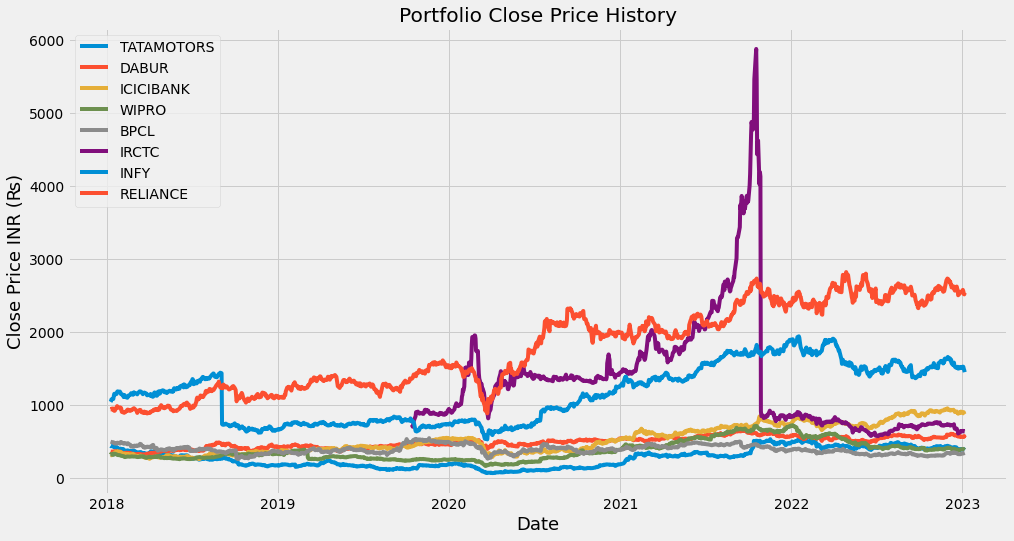

In [10]:
fig, ax = plt.subplots(figsize=(15,8))
for i in df.columns.values :
    ax.plot(df[i], label = i)
ax.set_title("Portfolio Close Price History")
ax.set_xlabel('Date', fontsize=18)
ax.set_ylabel('Close Price INR (₨)' , fontsize=18)
ax.legend(df.columns.values , loc = 'upper left')
plt.show(fig)

<br>**Correlation Matrix**</br>
"A Coefficient of correlation is a statistical measure of the relationship between two variables. It varies from -1 to 1, with 1 or -1 indicating perfect correlation. A correlation value close to 0 indicates no association between the variables. A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables.

The correlation matrix will tell us the strength of the relationship between the stocks in our portfolio, which essentially can be used for effective diversification." - 
tradewithpython


In [6]:
#Code to determine correlation matrix
correlation_matrix = df.corr(method='pearson')
correlation_matrix

,TATAMOTORS,DABUR,ICICIBANK,WIPRO,BPCL,IRCTC,INFY,RELIANCE
TATAMOTORS,1.000000,0.452700,0.724416,0.731269,-0.053664,-0.128738,0.862068,0.589512
DABUR,0.452700,1.000000,0.828484,0.739156,0.042286,0.349046,0.677672,0.886617
ICICIBANK,0.724416,0.828484,1.000000,0.712452,-0.084120,-0.130089,0.744865,0.875052
WIPRO,0.731269,0.739156,0.712452,1.000000,0.075417,0.315169,0.846440,0.717188
BPCL,-0.053664,0.042286,-0.084120,0.075417,1.000000,0.465422,0.018115,-0.101841
IRCTC,-0.128738,0.349046,-0.130089,0.315169,0.465422,1.000000,0.110023,-0.027239
INFY,0.862068,0.677672,0.744865,0.846440,0.018115,0.110023,1.000000,0.738730
RELIANCE,0.589512,0.886617,0.875052,0.717188,-0.101841,-0.027239,0.738730,1.000000


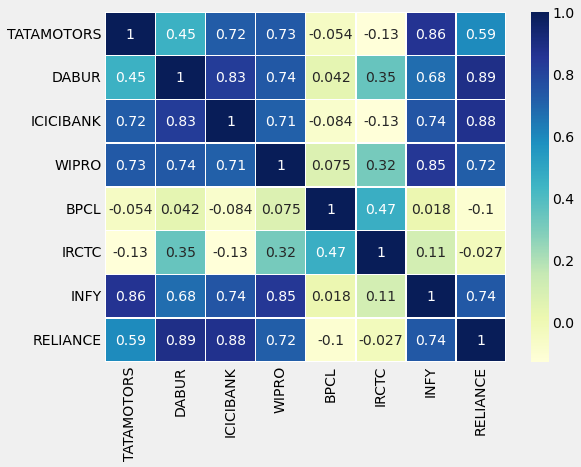

In [11]:
#Plot correlation matrix:
fig_correlation = plt.figure(figsize=(8,6))
sb.heatmap(correlation_matrix,xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns,
cmap='YlGnBu', annot=True, linewidth=0.5)

In [12]:
#Daywise return
daily_simple_return =df.pct_change(1)
daily_simple_return.dropna() 
daily_simple_return

,TATAMOTORS,DABUR,ICICIBANK,WIPRO,BPCL,IRCTC,INFY,RELIANCE
Date,,,,,,,,
2018-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-10,-0.009713,-0.004313,-0.001919,0.029950,-0.003628,NaN,0.010467,0.001488
2018-01-11,0.003346,0.005869,-0.008013,-0.017141,-0.003844,NaN,0.022381,-0.004881
2018-01-12,0.005405,-0.004862,0.026494,-0.007163,-0.005077,NaN,0.002463,0.011997
2018-01-15,-0.010867,0.008656,0.036512,-0.011920,-0.005511,NaN,0.002504,0.000158
...,...,...,...,...,...,...,...,...
2023-01-02,0.017657,0.000178,0.013021,0.000764,0.010136,0.004143,0.010476,0.011267
2023-01-03,-0.002280,-0.001247,-0.001219,0.010177,0.008986,0.002647,-0.000951,-0.007318
2023-01-04,-0.021071,-0.001783,-0.002496,-0.018512,-0.001633,-0.013741,-0.018226,-0.015056


Daily simple returns


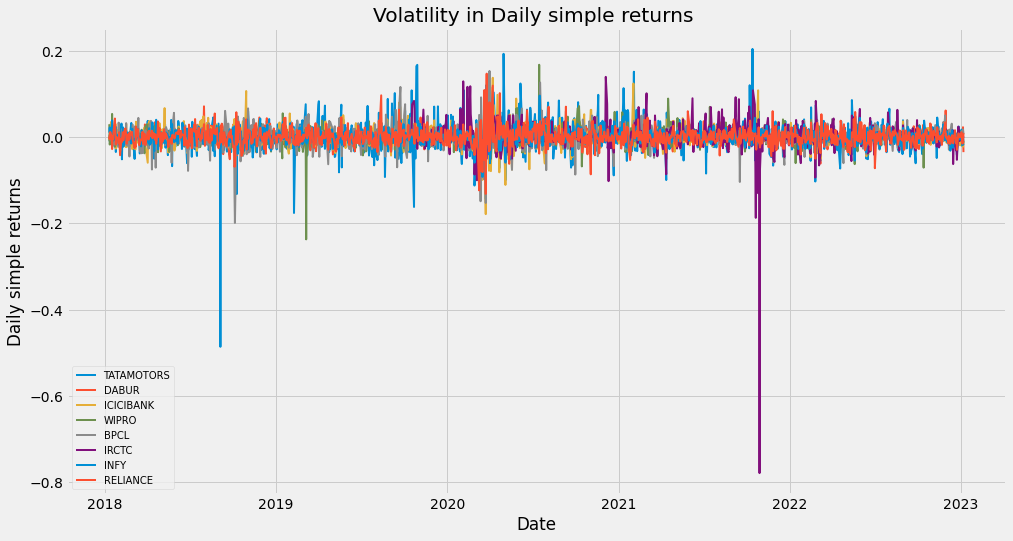

In [13]:
print('Daily simple returns')
fig, ax = plt.subplots(figsize=(15,8))


for i in daily_simple_return.columns.values :
    ax.plot(daily_simple_return[i], lw =2 ,label = i)


ax.legend( loc = 'buttom left' , fontsize =10)
ax.set_title('Volatility in Daily simple returns ')
ax.set_xlabel('Date')
ax.set_ylabel('Daily simple returns')
plt.show(fig)

In [14]:
print('Average Daily returns(%) of stocks in your portfolio')
Avg_daily = daily_simple_return.mean()
print(Avg_daily*100)

Average Daily returns(%) of stocks in your portfolio
TATAMOTORS    0.036537
DABUR         0.046831
ICICIBANK     0.107320
WIPRO         0.033923
BPCL          0.000702
IRCTC         0.114081
INFY          0.057875
RELIANCE      0.100020
dtype: float64


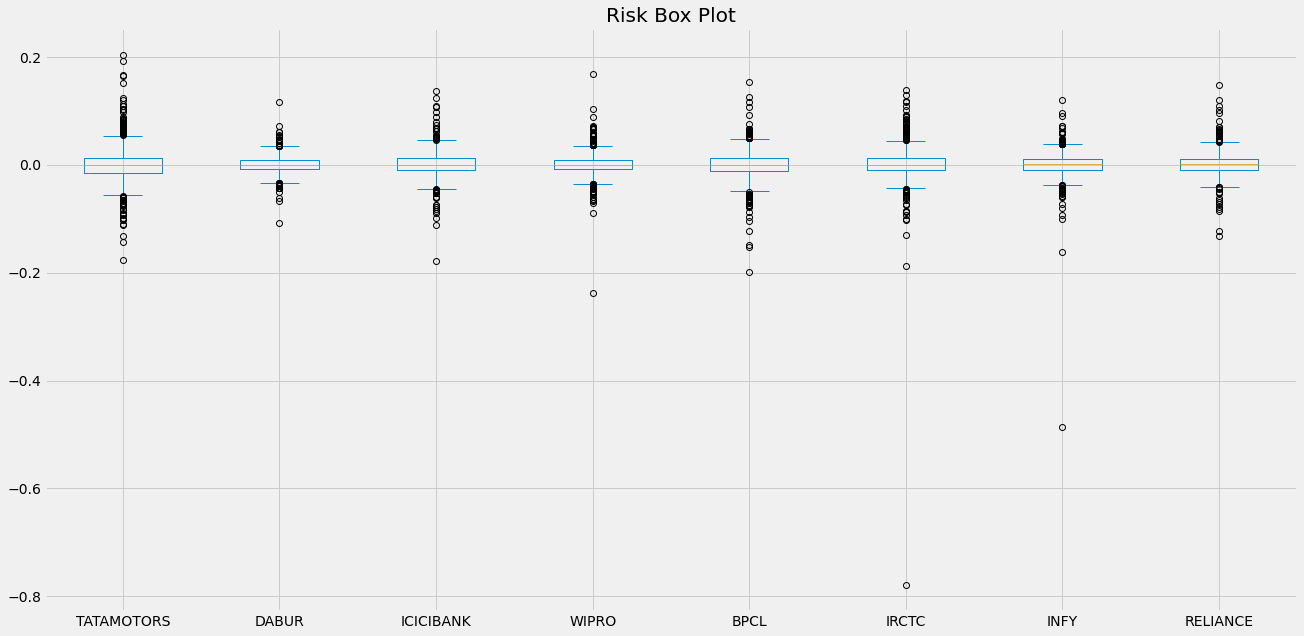

In [15]:
daily_simple_return.plot(kind = "box",figsize = (20,10), title = "Risk Box Plot")


In [16]:
print('Annualized Standard Deviation (Volatality(%), 252 trading days) of individual stocks in your portfolio on the basis of daily simple returns.')
print(daily_simple_return.std() * np.sqrt(252) * 100)

Annualized Standard Deviation (Volatality(%), 252 trading days) of individual stocks in your portfolio on the basis of daily simple returns.
TATAMOTORS    49.195120
DABUR         24.620433
ICICIBANK     35.121989
WIPRO         30.635869
BPCL          38.732910
IRCTC         62.676515
INFY          36.303163
RELIANCE      31.662548
dtype: float64


In [17]:
Avg_daily / (daily_simple_return.std() * np.sqrt(252)) *100

TATAMOTORS    0.074269
DABUR         0.190212
ICICIBANK     0.305564
WIPRO         0.110730
BPCL          0.001813
IRCTC         0.182015
INFY          0.159423
RELIANCE      0.315895
dtype: float64

In [18]:
daily_cummulative_simple_return =(daily_simple_return+1).cumprod()
daily_cummulative_simple_return

,TATAMOTORS,DABUR,ICICIBANK,WIPRO,BPCL,IRCTC,INFY,RELIANCE
Date,,,,,,,,
2018-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-10,0.990287,0.995687,0.998081,1.029950,0.996372,NaN,1.010467,1.001488
2018-01-11,0.993601,1.001531,0.990083,1.012295,0.992542,NaN,1.033082,0.996599
2018-01-12,0.998972,0.996661,1.016315,1.005044,0.987503,NaN,1.035627,1.008555
2018-01-15,0.988116,1.005287,1.053423,0.993064,0.982060,NaN,1.038220,1.008715
...,...,...,...,...,...,...,...,...
2023-01-02,0.902297,1.562683,2.886916,1.239124,0.672949,0.882652,1.463485,2.737552
2023-01-03,0.900240,1.560735,2.883397,1.251734,0.678996,0.884988,1.462092,2.717520
2023-01-04,0.881271,1.557952,2.876200,1.228562,0.677888,0.872827,1.435444,2.676603


Cummulative Returns


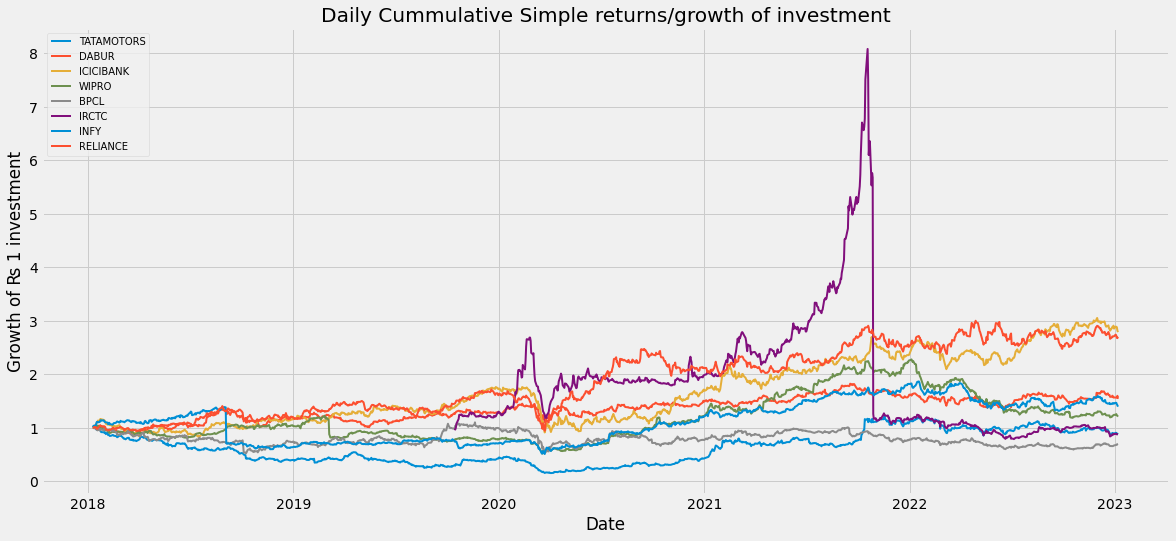

In [19]:
#visualize the daily cummulative simple return
print('Cummulative Returns')
fig, ax = plt.subplots(figsize=(18,8))

for i in daily_cummulative_simple_return.columns.values :
    ax.plot(daily_cummulative_simple_return[i], lw =2 ,label = i)

ax.legend( loc = 'upper left' , fontsize =10)
ax.set_title('Daily Cummulative Simple returns/growth of investment')
ax.set_xlabel('Date')
ax.set_ylabel('Growth of ₨ 1 investment')
plt.show(fig)